# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
print(resp.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">





    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.3.0.css">
    <style>
        h1.hero__header_small {
            font-size: 26px;
            margin: 12px 0;
        }

            h1.hero__header_eng {
                font-size: 20px;
                margin: -8px 0;
            }

        .chart-key-value .sp {
            p

In [4]:
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.765, 即時現金賣出: 30.435


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [57]:
for price in rate_table:
    print(price.find(name='div', attrs={'class':'visible-phone print_hide'}).text.replace(' ',''))
    
    print('即時現金買入：',price.find(name='td',attrs={'data-table':'本行現金買入'}).text)
    print('即時現金賣出：',price.find(name='td',attrs={'data-table':'本行現金賣出'}).text)
    
    print('---------------------')


美金(USD)

即時現金買入： 29.765
即時現金賣出： 30.435
---------------------

港幣(HKD)

即時現金買入： 3.728
即時現金賣出： 3.932
---------------------

英鎊(GBP)

即時現金買入： 35.92
即時現金賣出： 38.04
---------------------

澳幣(AUD)

即時現金買入： 18.16
即時現金賣出： 18.94
---------------------

加拿大幣(CAD)

即時現金買入： 21.24
即時現金賣出： 22.15
---------------------

新加坡幣(SGD)

即時現金買入： 20.64
即時現金賣出： 21.55
---------------------

瑞士法郎(CHF)

即時現金買入： 31.12
即時現金賣出： 32.32
---------------------

日圓(JPY)

即時現金買入： 0.2737
即時現金賣出： 0.2865
---------------------

南非幣(ZAR)

即時現金買入： -
即時現金賣出： -
---------------------

瑞典幣(SEK)

即時現金買入： 2.71
即時現金賣出： 3.23
---------------------

紐元(NZD)

即時現金買入： 17.66
即時現金賣出： 18.51
---------------------

泰幣(THB)

即時現金買入： 0.8133
即時現金賣出： 1.0033
---------------------

菲國比索(PHP)

即時現金買入： 0.5126
即時現金賣出： 0.6456
---------------------

印尼幣(IDR)

即時現金買入： 0.00168
即時現金賣出： 0.00238
---------------------

歐元(EUR)

即時現金買入： 32.89
即時現金賣出： 34.23
---------------------

韓元(KRW)

即時現金買入： 0.02287
即時現金賣出： 0.02677
---------------------

越南盾(VND)

即時現金買入： 0.00

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

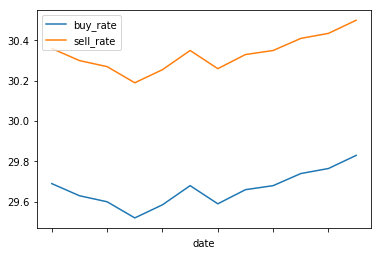

In [6]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-03")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

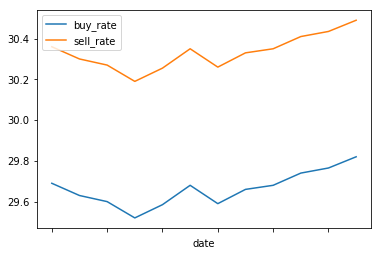


港幣(HKD)



<Figure size 720x576 with 0 Axes>

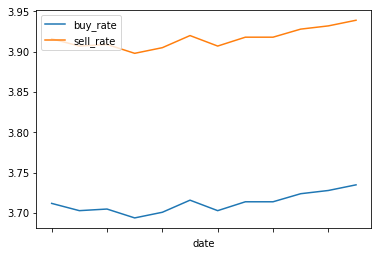


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

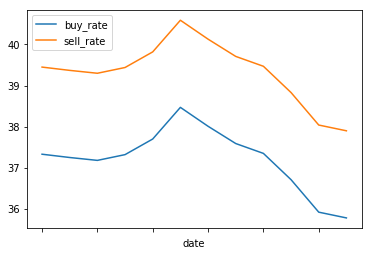


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

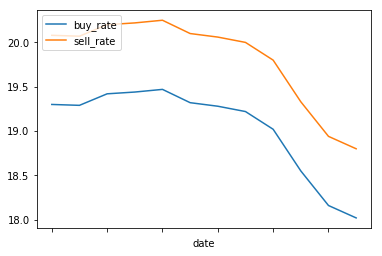


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

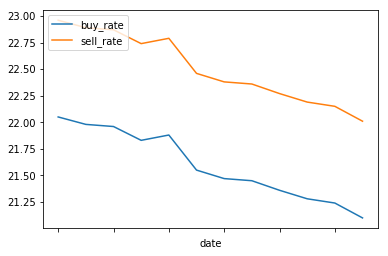


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

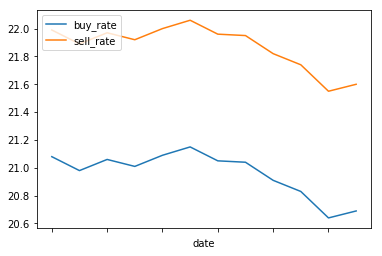


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

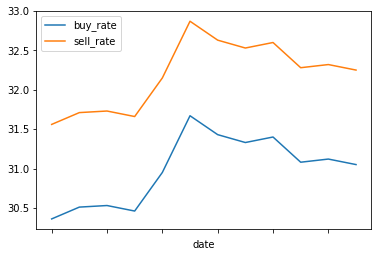


日圓(JPY)



<Figure size 720x576 with 0 Axes>

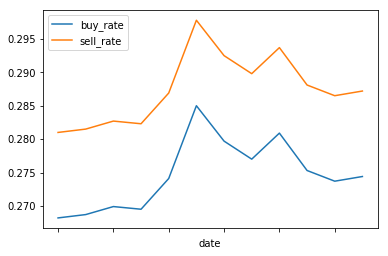


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

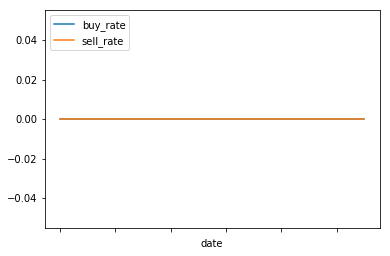


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

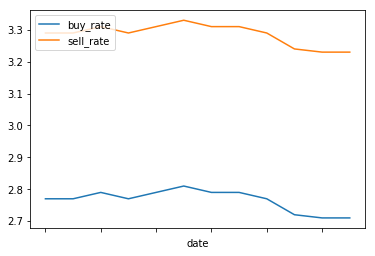


紐元(NZD)



<Figure size 720x576 with 0 Axes>

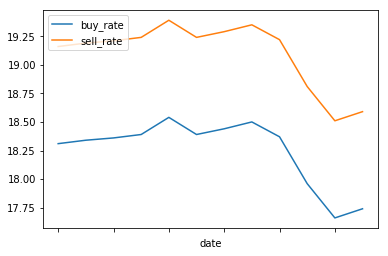


泰幣(THB)



<Figure size 720x576 with 0 Axes>

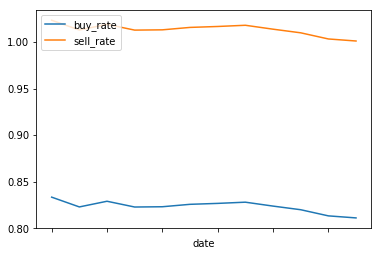


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

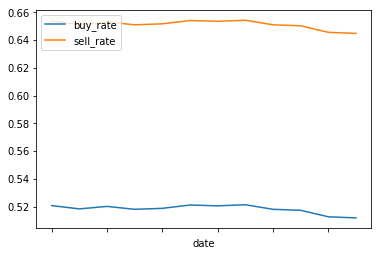


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

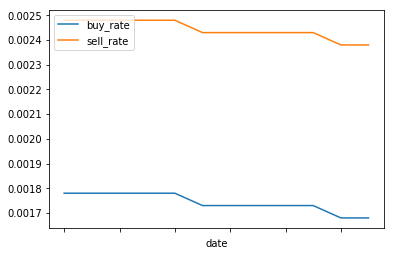


歐元(EUR)



<Figure size 720x576 with 0 Axes>

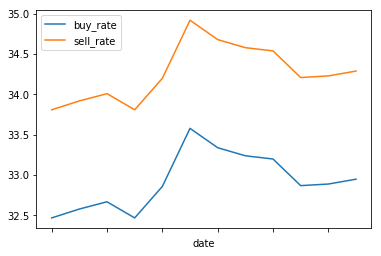


韓元(KRW)



<Figure size 720x576 with 0 Axes>

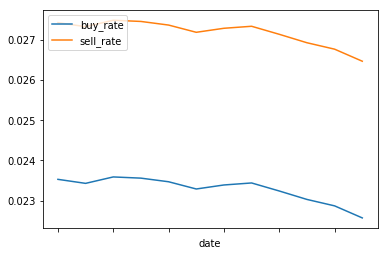


越南盾(VND)



<Figure size 720x576 with 0 Axes>

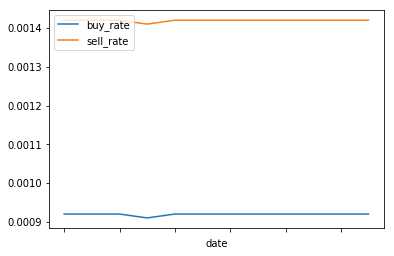


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

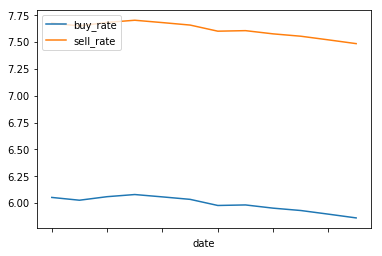


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

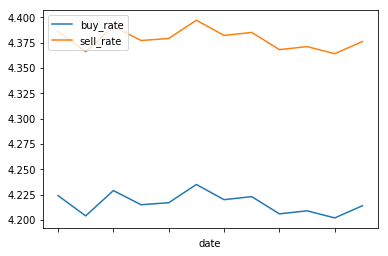

In [ ]:
x = 0
while True:
    try:
        # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
        currency = rate_table[x].find(name='div', attrs={'class':'visible-phone print_hide'})
        print(currency.get_text().replace(" ", ""))  # 貨幣種類


        # 針對美金，找到其「歷史匯率」的首頁 
        history_link = rate_table[x].find(name='td', attrs={'data-table':'歷史匯率'})
        history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

        # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料

        # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
        quote_history_url = history_rate_link.replace("history", "quote/2020-03")
        resp = requests.get(quote_history_url)
        resp.encoding = 'utf-8'
        history = BeautifulSoup(resp.text, "lxml")
        history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

        # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖

        date_history = list()
        history_buy = list()
        history_sell = list()

        for history_rate in history_table:
            # 擷取日期資料
            date_string = history_rate.a.get_text()
            date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
            date_history.append(date)  # 日期歷史資料

            history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
            history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
            history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

        # 將匯率資料建成dataframe形式
        HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

        HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
        HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

        # 畫出歷史匯率軌跡圖
        plt.figure(figsize=(10, 8))
        HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
        plt.legend(loc="upper left")
        plt.show()
    
        x+=1
    
    
    except:
        pass